In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e6/sample_submission.csv
/kaggle/input/playground-series-s5e6/train.csv
/kaggle/input/playground-series-s5e6/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s5e6/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e6/test.csv")
sample_submission = pd.read_csv("/kaggle/input/playground-series-s5e6/sample_submission.csv")

In [3]:
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)
print(train.head())
train.info()
train.describe()

Train Shape: (750000, 10)
Test Shape: (250000, 9)
   id  Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  \
0   0           37        70        36    Clayey  Sugarcane        36   
1   1           27        69        65     Sandy    Millets        30   
2   2           29        63        32     Sandy    Millets        24   
3   3           35        62        54     Sandy     Barley        39   
4   4           35        58        43       Red      Paddy        37   

   Potassium  Phosphorous Fertilizer Name  
0          4            5           28-28  
1          6           18           28-28  
2         12           16        17-17-17  
3         12            4        10-26-26  
4          2           16             DAP  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [4]:
print("No. of unique values in each column:")
print(train.nunique())
missing = train.isnull().sum()
print("No. of missing values in each column:")
print(missing)

No. of unique values in each column:
id                 750000
Temparature            14
Humidity               23
Moisture               41
Soil Type               5
Crop Type              11
Nitrogen               39
Potassium              20
Phosphorous            43
Fertilizer Name         7
dtype: int64
No. of missing values in each column:
id                 0
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


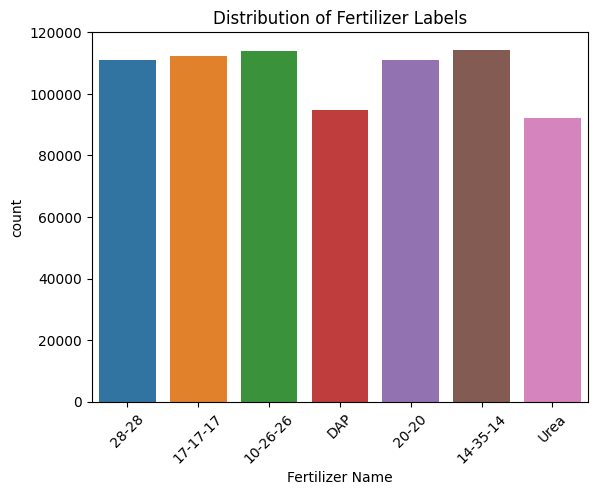

In [5]:
sns.countplot(x='Fertilizer Name', data=train)
plt.title("Distribution of Fertilizer Labels")
plt.xticks(rotation=45)
plt.show()

Soil Type - unique values:
 Soil Type
Sandy     156710
Black     150956
Clayey    148382
Red       148102
Loamy     145850
Name: count, dtype: int64


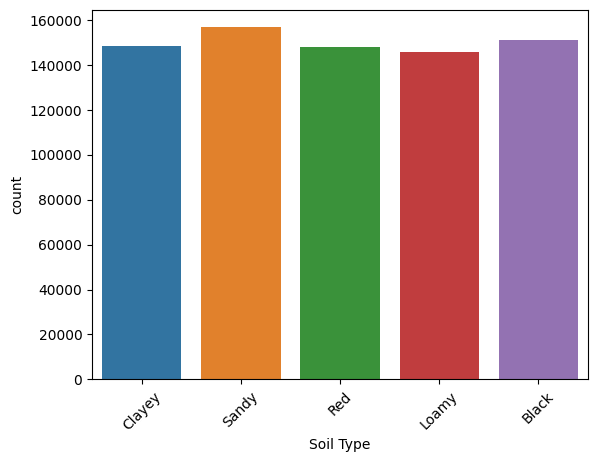

Crop Type - unique values:
 Crop Type
Paddy          85754
Pulses         78180
Cotton         69171
Tobacco        68000
Wheat          66628
Millets        65291
Barley         65045
Sugarcane      64269
Oil seeds      64184
Maize          62569
Ground Nuts    60909
Name: count, dtype: int64


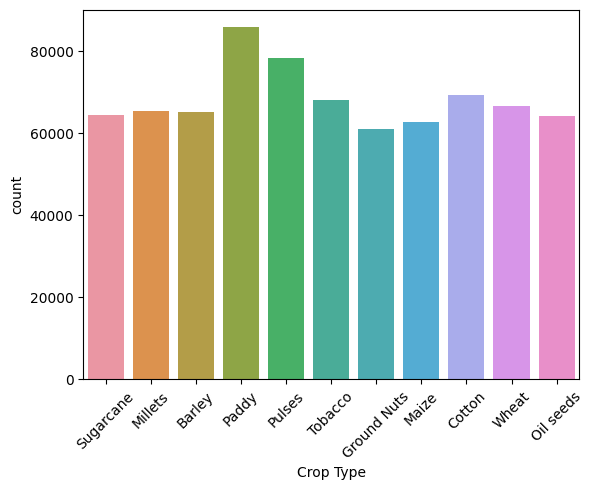

In [6]:
for col in ['Soil Type', 'Crop Type']:
    print(f"{col} - unique values:\n", train[col].value_counts())
    sns.countplot(x=col, data=train)
    plt.xticks(rotation=45)
    plt.show()

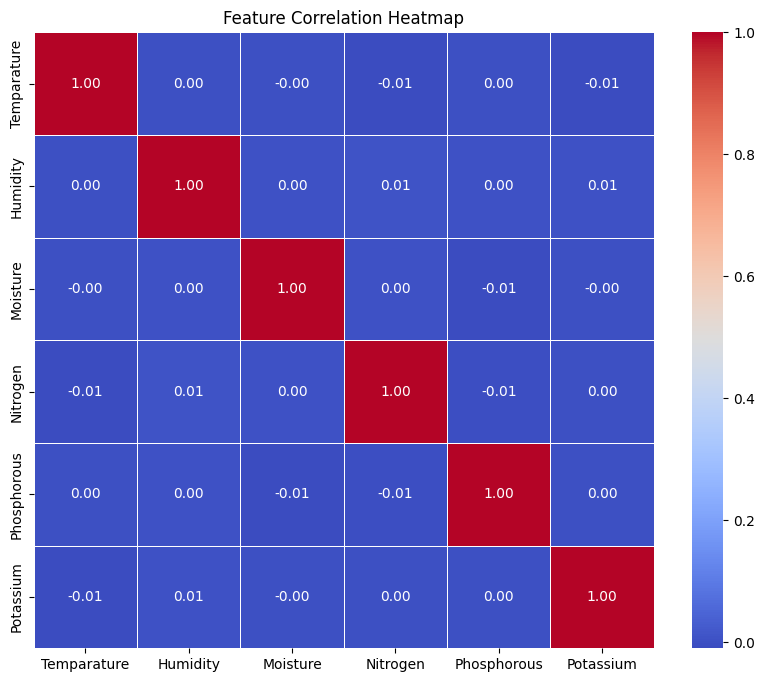

In [7]:
numerical_cols = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Phosphorous', 'Potassium']

corr_matrix = train[numerical_cols].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
X = train.drop(columns=['id', 'Fertilizer Name'])
y = train['Fertilizer Name']

In [9]:
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

In [10]:
fertilizer_mapping = dict(zip(le_y.transform(le_y.classes_), le_y.classes_))
print(fertilizer_mapping)

{0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}


In [11]:
categorical_features = ['Soil Type', 'Crop Type']
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    test[col] = le.transform(test[col])

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [13]:
print("Train shape:", X_train.shape)
print("Validation shape:", X_valid.shape)

Train shape: (600000, 8)
Validation shape: (150000, 8)


In [14]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, log_loss

lgb_model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=7,
    learning_rate=0.1,
    num_leaves=31,
    n_estimators=200,
    random_state=42,
    verbose=-1
)

lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric='multi_logloss',
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[200]	valid_0's multi_logloss: 1.9236


LGBMClassifier(n_estimators=200, num_class=7, objective='multiclass',
               random_state=42, verbose=-1)

In [16]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=7,
    eval_metric='mlogloss',
    use_label_encoder=False,
    learning_rate=0.1,
    n_estimators=200,
    early_stopping_rounds=10
)

xgb_model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=7, num_parallel_tree=None, ...)

In [17]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    loss_function='MultiClass',
    iterations=200,
    learning_rate=0.1,
    verbose=0
)

cat_model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=10)

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [19]:
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.base import clone
import numpy as np

def map3_score(model, y_true, y_prob):
    top3_preds = np.argsort(y_prob, axis=1)[:, -3:][:, ::-1]

    y_true_matrix = np.zeros_like(y_prob)
    y_true_matrix[np.arange(len(y_true)), y_true] = 1

    return label_ranking_average_precision_score(y_true_matrix, y_prob)


In [20]:
models = [lgb_model, xgb_model, cat_model, rf]
names = ['LightGBM', 'XGBoost', 'CatBoost', 'RandomForest']

for m, name in zip(models, names):
    y_prob = m.predict_proba(X_valid)
    score = map3_score(m,y_valid, y_prob)
    print(f"{name}: MAP@3 = {score:.4f}")

LightGBM: MAP@3 = 0.4194
XGBoost: MAP@3 = 0.4202
CatBoost: MAP@3 = 0.4091
RandomForest: MAP@3 = 0.3896


In [21]:
# import optuna
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import StratifiedKFold

# def objective(trial):
#     params = {
#         'objective': 'multiclass',
#         'num_class': 7,
#         'metric': 'None',
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
#         'num_leaves': trial.suggest_int('num_leaves', 20, 100),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
#         'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
#         'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
#         'verbosity': -1
#     }

#     skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
#     scores = []

#     for train_idx, valid_idx in skf.split(X, y_encoded):
#         X_train_fold, X_valid_fold = X.iloc[train_idx], X.iloc[valid_idx]
#         y_train_fold, y_valid_fold = y_encoded[train_idx], y_encoded[valid_idx]

#         model = lgb.LGBMClassifier(**params, n_estimators=200)
#         model.fit(X_train_fold, y_train_fold)

#         y_prob = model.predict_proba(X_valid_fold)
#         score = map3_score(model,y_valid_fold, y_prob)
#         scores.append(score)

#     return np.mean(scores)
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=20)

# print("Best Hyperparameters:", study.best_params)
# print("Best MAP@3 Score:", study.best_value)

In [22]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, log_loss

lgb_model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=7,
    learning_rate=0.14987951571614438,
    num_leaves=76,
    max_depth=6,
    min_child_samples=50,
    feature_fraction=0.769263838588152,
    bagging_fraction=0.8485481048754262,
    n_estimators=200,
    random_state=42,
    verbose=-1
)

lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric='multi_logloss',
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[200]	valid_0's multi_logloss: 1.91747


LGBMClassifier(bagging_fraction=0.8485481048754262,
               feature_fraction=0.769263838588152,
               learning_rate=0.14987951571614438, max_depth=6,
               min_child_samples=50, n_estimators=200, num_class=7,
               num_leaves=76, objective='multiclass', random_state=42,
               verbose=-1)

In [23]:
test_ids = test['id']
X_test = test.drop(columns=['id'])
y_test = lgb_model.predict_proba(X_test)

In [24]:
top3_indices = np.argsort(y_test, axis=1)[:, -3:][:, ::-1]  
top3_fertilizers = []
for row in top3_indices:
    top3_fertilizers.append(le_y.inverse_transform(row))
top3_fertilizers = np.array(top3_fertilizers)

In [25]:
submission = pd.DataFrame({
    'id': test_ids,
    'Fertilizer Name': [' '.join(row) for row in top3_fertilizers]
})
submission.to_csv("submission.csv", index=False)

In [26]:
y_out1 = lgb_model.predict_proba(X_train)
y_out2 = lgb_model.predict_proba(X_valid)
top3_1 = np.argsort(y_out1, axis=1)[:, -3:][:, ::-1]  
top3_2 = np.argsort(y_out2, axis=1)[:, -3:][:, ::-1]

In [27]:
def top3_accuracy(top3_preds, y_true):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] in top3_preds[i]:
            correct += 1
    return 100.0 * correct / len(y_true)

In [28]:
print("Evaluation Results:")
print("Training set:")
print(top3_accuracy(top3_1,y_train),"%")
print("Cross Validation set:")
print(top3_accuracy(top3_2,y_valid),"%")

Evaluation Results:
Training set:
61.7015 %
Cross Validation set:
52.1 %
